<a href="https://colab.research.google.com/github/AllieUbisse/end-to-end-ml/blob/master/notebooks/feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Overview
This tutorial is divided into five parts; they are:

- Feature Importance
- Preparation
    - Check Scikit-Learn Version
    - Test Datasets
-Coefficients as Feature Importance
    - Linear Regression Feature Importance
    - Logistic Regression Feature Importance
- Decision Tree Feature Importance
    - CART Feature Importance
    - Random Forest Feature Importance
    - XGBoost Feature Importance
- Permutation Feature Importance
    - Permutation Feature Importance for Regression
    - Permutation Feature Importance for Classification

**Feature Importance**


[Feature importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/) *refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.*


Feature importance scores can be calculated for problems that involve predicting a numerical value, called regression, and those problems that involve predicting a class label, called classification.


**The scores are useful and can be used in a range of situations in a predictive modeling problem, such as:**

- Better understanding the data.
- Better understanding a model.
- Reducing the number of input features.



**These examples might be selective but just know is can be done for both classifiction and regression problems**

# imports

In [0]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

# datasets
from sklearn.datasets import make_regression, make_classification

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

# Datasets 

The dataset will have **1000 observations**, with **10 features**, 5 of which will be informative and the remaining 5 will be redundant.

We will fix the random number seed to ensure we get the same examples each time the code is run.

## Classification Dataset

- **X_c** for Classification **features**
- **y_c** for Classification **label / Target**

In [79]:
#  Dataset for a classification problem
X_c, y_c = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# viewing the shapes of x and y
X_c.shape, y_c.shape


((1000, 10), (1000,))

In [80]:
# convert x_c to dataframe and view the 1st 5 rows of x_c
X_c = pd.DataFrame(X_c, columns=[f'X_clf_'+ str(x + 1)  for x in range(10)])
X_c.head()

,X_clf_1,X_clf_2,X_clf_3,X_clf_4,X_clf_5,X_clf_6,X_clf_7,X_clf_8,X_clf_9,X_clf_10
0,2.569995,-0.130200,3.160751,-4.359364,-1.612720,-1.393521,-2.489249,-1.930941,3.261304,2.056921
1,0.341293,2.513214,-0.804166,1.291966,2.057731,-3.110983,1.465830,6.247344,-1.927694,2.950315
2,2.275400,3.365615,0.171644,1.248620,0.302498,-1.137814,-1.608199,2.746938,0.134924,2.003395
3,0.357846,0.905176,-0.259241,0.930414,0.112336,0.143484,-0.367149,0.658955,-0.269128,0.155807
4,-2.722477,0.324236,2.906472,-0.021218,-2.867399,1.591744,0.620849,3.383528,0.945621,3.498071


## Regression Dataset

- **X_r** for regression **features**
- **y_r** for regression **label / Target**

In [77]:
#  Dataset for a Regression problem
X_r, y_r = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# viewing the shapes of x and y
X_r.shape, y_r.shape

((1000, 10), (1000,))

In [78]:
# convert x_r to dataframe and view the 1st 5 rows of x_r
X_r = pd.DataFrame(X_r, columns=[f'X_reg_'+ str(x + 1)  for x in range(10)])
X_r.head()

,X_reg_1,X_reg_2,X_reg_3,X_reg_4,X_reg_5,X_reg_6,X_reg_7,X_reg_8,X_reg_9,X_reg_10
0,-2.022201,0.315635,0.827975,-0.306204,0.160037,-1.444114,0.876169,-0.504466,0.230095,0.762011
1,0.712562,1.741039,-1.214665,0.385692,-0.809715,-0.550694,-0.051473,1.041311,-0.758506,0.747916
2,0.083389,0.928290,1.451679,-0.424983,-0.300931,0.189199,0.251310,1.223936,0.341689,-0.125173
3,-0.376360,1.694051,0.397112,-0.919975,-0.362023,0.472427,0.876808,0.661291,-0.072041,0.205317
4,0.237884,-1.045509,-1.087603,-0.792266,-0.206058,0.620718,-0.683158,-2.095867,-0.583576,-1.544487


# custom functions to visualize the feature importance



In [0]:
def show_feature_importance(importance, X, model_type):
   
      for feature, score in enumerate(importance):
          print(f'Feature {feature+1} : {score} ')
        
      
      # plot the feature inportance
      plt.bar([x for x in X.columns], importance)

      # set labels
      plt.title(f'Feature importance using {model_type}')
      plt.xlabel('features')
      plt.xticks(rotation=75)
      plt.ylabel('Importance score')

      # display the plot
      plt.show()

# Coefficients as Feature Importance

Linear machine learning algorithms fit a model where the prediction is the weighted sum of the input values.

- Examples include **linear regression**, **logistic regression**, and extensions that add regularization, such as **ridge regression** and the **elastic net**.


- All of these algorithms find a **set of coefficients** to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a crude type of **feature importance score.**

## Regression Feature importance

- We can fit a LinearRegression model on the regression dataset and retrieve the **coeff_**  *property* that contains the coefficients found for each input variable.

- These **coefficients** can provide the basis for a crude **feature importance score**. This **assumes** that the input variables have the **same scale or have been scaled prior to fitting a model.**

Feature 1 : -2.782282462456991e-14 
Feature 2 : 12.444827855389741 
Feature 3 : -2.3092638912203256e-14 
Feature 4 : -2.3314683517128287e-14 
Feature 5 : 93.32225450776932 
Feature 6 : 86.50810998606806 
Feature 7 : 26.746066698034518 
Feature 8 : 3.2853463982621425 
Feature 9 : -2.4868995751603507e-14 
Feature 10 : 3.108624468950438e-14 


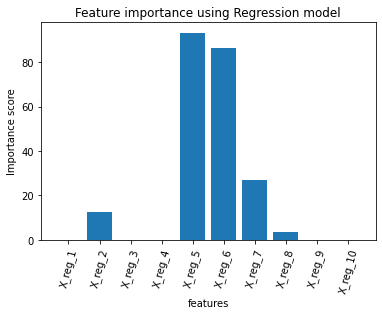

In [103]:
# define the linear regression model instance
lin_reg =  LinearRegression()

# fit the model with the X_r and y_r dataset
lin_reg.fit(X_r,y_r)

# get importance by retrieving the coefficients 
importance = lin_reg.coef_

# summary of feature importance
show_feature_importance(importance, X_r, 'Regression model')

**Reports the coefficient value for each feature:**

- The scores suggest that the model found the **5 important features**.
- Then marked all other features with a **zero coefficient**, essentially removing them from the model.

## classification Feature Importance

### **Logistic Regression Feature Importance for classification**

- We can fit a **LogisticRegression** model on the regression dataset and retrieve the **coeff_** property that contains the coefficients found for each input variable.

- These coefficients can provide the basis for a crude feature importance score. 
- This assumes that the **input variables** have the **same scale** or have been **scaled prior to fitting a model**.


Feature 1 : 0.16319742265326478 
Feature 2 : -0.6430145358815721 
Feature 3 : 0.4849664987788699 
Feature 4 : -0.46189527029357874 
Feature 5 : 0.1843177707945146 
Feature 6 : -0.1197809769659298 
Feature 7 : -0.40602039913269794 
Feature 8 : 0.037718813935295366 
Feature 9 : -0.5178542284781591 
Feature 10 : 0.2653987129506489 


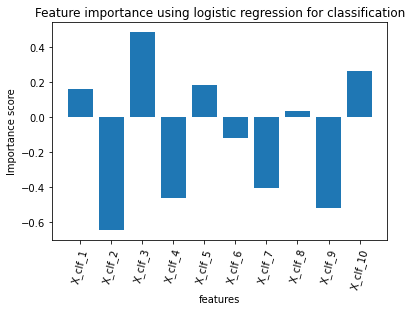

In [104]:
# define the logistic regression model instance for classification
log_clf = LogisticRegression()

# fit the model with x_c and y_c for classification dataset
log_clf.fit(X_c, y_c)

# get importance
log_reg_importance = log_clf.coef_[0]

# show summary of feature importance
show_feature_importance(log_reg_importance, X_c, 'logistic regression for classification')

**Report**

Some importance scores are negative and some are positive, hence it's a classification problem so,
- **Positive  Score:**  indicate a feature that predicts **class 1**
- **Negative  Score:** indicate a feature that predicts **class 0**
- **No clear** pattern of **important** and **unimportant features** can be identified from the above results, at least from what I can tell

### **CART Classification Feature Importance**

The example of fitting a **DecisionTreeClassifier** and summarizing the calculated feature importance scores.

- We can use the CART algorithm for feature importance implemented in scikit-learn.tree as the **DecisionTreeClassifier** classes.

- After being fit, the model provides a **feature_importances_** property that can be accessed to retrieve the relative importance scores for each input feature.

***Let’s take a look at an example of this for classification.***

Feature 1 : 0.023371340626075376 
Feature 2 : 0.0036238281277542763 
Feature 3 : 0.18714484410334017 
Feature 4 : 0.30979743520331277 
Feature 5 : 0.0969634800102134 
Feature 6 : 0.009614263894065823 
Feature 7 : 0.16795155925817723 
Feature 8 : 0.036603214995131056 
Feature 9 : 0.13524975593114583 
Feature 10 : 0.029680277850784125 


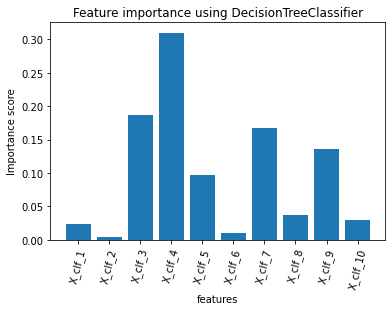

In [108]:
# define the DecisionTreeClassifier instance
tree_clf = DecisionTreeClassifier()

# fit the model with X_c and y_c for classification dataset
tree_clf.fit(X_c, y_c)

# get importance
tree_clf_importance = tree_clf.feature_importances_

# summary of feature importance
show_feature_importance(tree_clf_importance, X_c, 'DecisionTreeClassifier')

**Report**

Note - we check how closer to **1** is the immportance score.

- The model found 4 features being important with 0.1 > score
- The rest were least important to this model.


### **Random Forest Classification Feature Importance**

fitting a **RandomForestClassifier** and summarizing the calculated feature importance scores.

- We can use the Random Forest algorithm for feature importance implemented in **scikit-learn** as the **RandomForestClassifier classes**.

- After being fit, the model provides a **feature_importances_** property that can be accessed to retrieve the relative importance scores for each input feature.

- This approach can also be used with the **bagging** and **extra trees algorithms**.

Feature 1 : 0.06647391947897288 
Feature 2 : 0.11240270429230018 
Feature 3 : 0.1602466938549085 
Feature 4 : 0.1859268408487944 
Feature 5 : 0.07968460600757452 
Feature 6 : 0.11673160446859134 
Feature 7 : 0.09846011725129591 
Feature 8 : 0.051931902703150803 
Feature 9 : 0.08444048607436896 
Feature 10 : 0.043701125020042496 


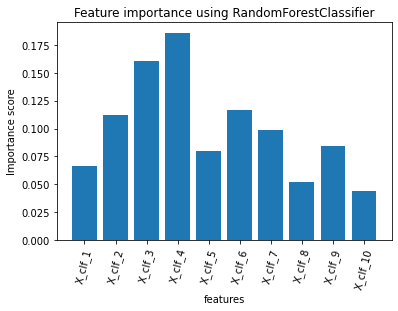

In [113]:
# define the random forest cassifier instance
rf_clf = RandomForestClassifier()

# fit the model with X_c and y_c dataset for classification problem
rf_clf.fit(X_c, y_c)

# get importance
rf_clf_importance = rf_clf.feature_importances_

# show summary of feature importane
show_feature_importance(rf_clf_importance, X_c, 'RandomForestClassifier')

**Reports**

- The results suggest 2 or 3 of the 10 features as being important to prediction.


### **XGBoost Classification Feature Importance**
fitting an XGBClassifier and summarizing the calculated feature importance scores.

- XGBoost is a library that provides an efficient and effective implementation of the stochastic gradient boosting algorithm.

- This algorithm can be used with scikit-learn via the XGBRegressor and XGBClassifier classes.

- After being fit, the model provides a **feature_importances_** property that can be accessed to retrieve the relative importance scores for each input feature.

- This algorithm is also provided via scikit-learn via the **GradientBoostingClassifier** and **GradientBoostingRegressor classes** and the **same approach to feature selection** can be used.

- **First, install the XGBoost library, such as with pip**:
```python
pip install xgboost
```


**The next example is based on classification (GradientBoostingClassifier)**

Feature 1 : 0.024640509858727455 
Feature 2 : 0.08152605593204498 
Feature 3 : 0.12516480684280396 
Feature 4 : 0.2840004861354828 
Feature 5 : 0.12694063782691956 
Feature 6 : 0.10751913487911224 
Feature 7 : 0.08624178171157837 
Feature 8 : 0.04819878563284874 
Feature 9 : 0.09356743097305298 
Feature 10 : 0.022200465202331543 


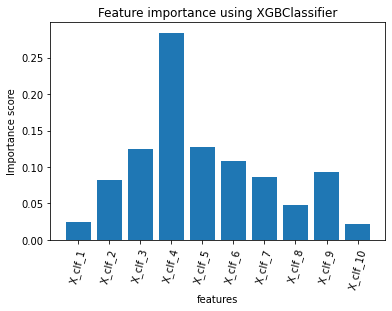

In [112]:
# define the XGBClassifier
xgb_clf = XGBClassifier()

# fit the model with X_c and y_c dataset for classification problem
xgb_clf.fit(X_c, y_c)

# get importance
xgb_clf_importance = xgb_clf.feature_importances_

# summary for feature importance
show_feature_importance(xgb_clf_importance, X_c, 'XGBClassifier')

**Report**

- The model found 5 best features and overall 7 features being important
- from **x_clf_2** to **X_clf_7** and **X_clf_9** we added **x_clf_2** and **X_clf_7** since they are 0.05 > 

## Permutation Feature Importance
> Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used.

> First, a model is fit on the dataset, such as a model that does not support native feature importance scores. 
> Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. This is repeated for each feature in the dataset.
>  Then this whole process is repeated 3, 5, 10 or more times. The result is a mean importance score for each input feature (and distribution of scores given the repeats).

**where and how?**
- This approach can be used for **regression or classification**.
- **requires that a performance metric** be chosen as the basis of the **importance score**, such as:
  - **regression** : mean squared error
  - **classification**: accuracy

- Permutation feature selection can be used via the **permutation_importance()** function that takes a fit model, a dataset (**train** or **test** dataset is fine), and a **scoring function**.

- Let’s take a look at this approach to feature selection with an algorithm that does not support feature selection natively, specifically **k-nearest neighbors**.



Feature 1 : 155.24451457715395 
Feature 2 : 363.0628339438763 
Feature 3 : 156.15478193207764 
Feature 4 : 37.90738516203537 
Feature 5 : 9313.318971870336 
Feature 6 : 8023.842031013347 
Feature 7 : 933.7098103230179 
Feature 8 : 120.14445156798429 
Feature 9 : 77.35946549457967 
Feature 10 : 98.63404535084055 


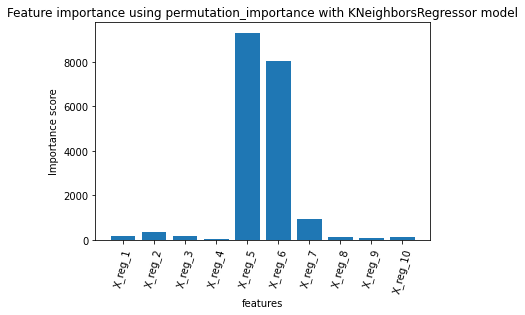

In [118]:
# define the KNN regression instance
knn_reg = KNeighborsRegressor()

# fit the model with the regression dataset X_r and y_r
knn_reg.fit(X_r, y_r)

# get importance via the permutation_importance function
knn_reg_results = permutation_importance(knn_reg, X_r, y_r, scoring='neg_mean_squared_error', n_jobs=-1)
knn_reg_importance = knn_reg_results.importances_mean

# show summary of feature importance
show_feature_importance(knn_reg_importance, X_r, 'permutation_importance with KNeighborsRegressor model')


**Report**

The results suggest perhaps 2 or 3 of the 10 features as being important to prediction.
- Namely feature **x_reg_5** and **x_reg_6** 

## Further Reading and acknowledgements

> Thanks to [machine learning mastery](https://machinelearningmastery.com/)

> more resources on the topic if you are looking to go deeper.
- [An Introduction to Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)
- [How to Perform Feature Selection with Categorical Data](https://machinelearningmastery.com/feature-selection-with-categorical-data/)
- [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)